In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('dataset/Linear Regression.xlsx')

In [3]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [4]:
df.skew()

price          4.024069
sqft_living    1.471555
bedrooms       1.974300
bathrooms      0.511108
floors         0.616177
dtype: float64

In [5]:
df.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


In [6]:
df.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [7]:
scaler = StandardScaler().fit_transform(df)

## Regression between price and sqft_living

In [8]:
Y = scaler[:,0]
X1 = scaler[:,1]
X1 = sm.add_constant(X1)
model = sm.OLS(Y, X1)
result = model.fit()

In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:36:35   Log-Likelihood:                -23330.
No. Observations:               21613   AIC:                         4.666e+04
Df Residuals:                   21611   BIC:                         4.668e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.293e-17      0.005  -1.51e-14      1.000      -0.009       0.009
x1             0.7020      0.005    144.920      0.000       0.693       0.712
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.709
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

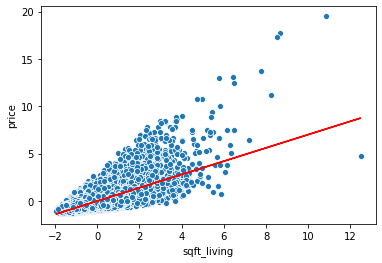

In [10]:
sns.scatterplot(scaler[:,1], scaler[:,0])
plt.xlabel('sqft_living')
plt.ylabel('price')

X_plot = scaler[:,1]

#Equation

Y_plot = 0.7020*X_plot-7.293e-17
plt.plot(X_plot, Y_plot, color='r')
plt.show()

Base on summary we can get information that, R-squared is 0.493, it means 49.3% sqft can affect the price.
and base on p value is 0 < 0.05, it means we reject that there is no dependecy between sqft and price (Ho)

## Regression between price and Bedrooms

In [11]:
Y = scaler[:,0]
X2 = scaler[:,2]
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y, X2)
result2 = model2.fit()

In [12]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2271.
Date:                Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:36:35   Log-Likelihood:                -29588.
No. Observations:               21613   AIC:                         5.918e+04
Df Residuals:                   21611   BIC:                         5.920e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.293e-17      0.006  -1.13e-14      1.000      -0.013       0.013
x1             0.3083      0.006     47.651      0.000       0.296       0.321
==============================================================================
Omnibus:                    18859.406   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1199044.953
Skew:                           3.904   Prob(JB):                         0.00
Kurtosis:                      38.644   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

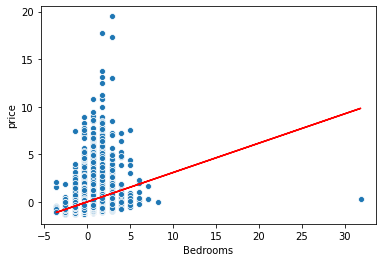

In [13]:
sns.scatterplot(scaler[:,2], scaler[:,0])
plt.xlabel('Bedrooms')
plt.ylabel('price')

X_plot = scaler[:,2]

# Equation
Y_plot = 0.3083*X_plot-7.293e-17
plt.plot(X_plot, Y_plot, color='r')
plt.show()

Base on summary we can get information that, R-squared is 0.095, it means 9.5% Bedroom can affect the price, really small effect. we can also see on the plot, bedroom doesnt have strong fit linear line,
and base on p value is 0 < 0.05, it means we reject that there is no dependecy between bedrooms and price (Ho)

## Regression between price and Bathrooms

In [14]:
Y = scaler[:,0]
X3 = scaler[:,3]
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y, X3)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8229.
Date:                Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:36:36   Log-Likelihood:                -27181.
No. Observations:               21613   AIC:                         5.437e+04
Df Residuals:                   21611   BIC:                         5.438e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.293e-17      0.006  -1.26e-14      1.000      -0.011       0.011
x1             0.5251      0.006     90.714      0.000       0.514       0.536
==============================================================================
Omnibus:                    17286.361   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           887102.348
Skew:                           3.458   Prob(JB):                         0.00
Kurtosis:                      33.614   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

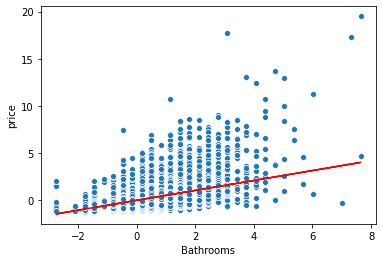

In [15]:
sns.scatterplot(scaler[:,3], scaler[:,0])
plt.xlabel('Bathrooms')
plt.ylabel('price')

X_plot = scaler[:,3]
Y_plot = 0.5251*X_plot-7.293e-17
plt.plot(X_plot, Y_plot, color='r')
plt.show()

Base on summary we can get information that, R-squared is 0.276 , it means 27.6% bathroom can affect the price, quite enough effect, and base on p value is 0 < 0.05, it means we reject that there is no dependecy between bathroom and price (Ho)

## Regression between price and Floors

In [16]:
Y = scaler[:,0]
X4 = scaler[:,4]
X4 = sm.add_constant(X4)
model4 = sm.OLS(Y, X4)
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1526.
Date:                Mon, 10 Aug 2020   Prob (F-statistic):          1.58e-322
Time:                        23:36:36   Log-Likelihood:                -29930.
No. Observations:               21613   AIC:                         5.986e+04
Df Residuals:                   21611   BIC:                         5.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.293e-17      0.007  -1.11e-14      1.000      -0.013       0.013
x1             0.2568      0.007     39.060      0.000       0.244       0.270
==============================================================================
Omnibus:                    19377.136   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1260093.162
Skew:                           4.077   Prob(JB):                         0.00
Kurtosis:                      39.507   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

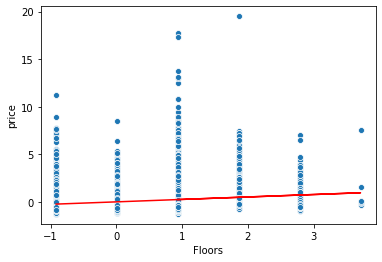

In [17]:
sns.scatterplot(scaler[:,4], scaler[:,0])
plt.xlabel('Floors')
plt.ylabel('price')

X_plot = scaler[:,4]
# Equation
Y_plot = 0.2568*X_plot-7.293e-17
plt.plot(X_plot, Y_plot, color='r')
plt.show()

Base on summary we can get information that, R-squared is 0.066, it means 6.6% floors can affect the price, really small effect, and base on p value is 0 < 0.05, it means we reject that there is no dependecy between floors and price (Ho)

## Regression between price and all others variable

In [18]:
Y = scaler[:,0]
X5 = scaler[:,1:]
X5 = sm.add_constant(X5)
model5 = sm.OLS(Y, X5)
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     5554.
Date:                Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:36:36   Log-Likelihood:                -23026.
No. Observations:               21613   AIC:                         4.606e+04
Df Residuals:                   21608   BIC:                         4.610e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.599e-17      0.005  -1.38e-14      1.000      -0.009       0.009
x1             0.7740      0.008    100.228      0.000       0.759       0.789
x2            -0.1465      0.006    -24.644      0.000      -0.158      -0.135
x3             0.0165      0.008      2.059      0.040       0.001       0.032
x4             0.0003      0.006      0.053      0.958      -0.011       0.011
==============================================================================
Omnibus:                    14450.413   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           494760.938
Skew:                           2.739   Prob(JB):                         0.00
Kurtosis:                      25.790   Cond. No.                         3.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Base on summary we can get information that, R-squared is 0.507, it means our model accuracy is 50.7%. this is quite bad model for prediction.
as we can see floor(X4) has the largest p-value (0.958), this indicates that floor statiscally not significant, as we can at below graph of correlation, floors has the smallest correlation value

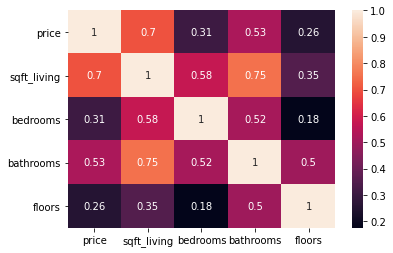

In [19]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [21]:
df.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

## Final equation is 

y = -6.599e-17 + 0.7740*('sqft') -0.1465*('bedrooms') +0.0165 * ('bathrooms')